In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import json
import csv
import os
from bmtool.util import util
from bmtk.simulator import bionet

from analysis import plot # imoporting analysis module enables import from model folder
from build_input import get_populations

config = 'config.json'
config_file = os.path.join('..', 'Model', config)

In [2]:
conf = bionet.Config.from_json(config_file)
nodes = util.load_nodes_from_config(config_file)
network_name = 'cortex'
cortex_df = nodes[network_name]

pop_color = plot.pop_color
pop_names = plot.pop_names
Cortex_nodes = get_populations(cortex_df, pop_names)

In [3]:
from scipy.spatial.transform import Rotation as R

electrodes = pd.read_csv(conf['reports']['ecp']['electrode_positions'], sep=' ', index_col='channel')
elec_pos = electrodes.loc[0].values
elec_len, elec_wid = 330., 8.
elec_pts = np.array([[elec_len, 0., -elec_wid], [0., 0., 0.,], [elec_len, 0., elec_wid]])
elec_pos = elec_pos[None, :] + R.from_euler('y', -80, degrees=True).apply(elec_pts )

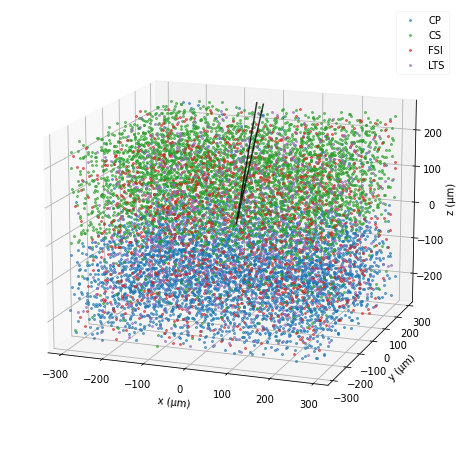

In [4]:
pos_axis = ['pos_x', 'pos_y', 'pos_z']
ax = plt.figure(figsize=(8, 10)).add_subplot(projection='3d')
for p, df in Cortex_nodes.items():
    pos = df[pos_axis].values
    ax.plot(*pos.T, color=pop_color[p], linestyle='none', marker='o', markersize=2, alpha=0.6, label=p)
ax.plot(*elec_pos.T, color='k', linewidth=1.5, alpha=0.8)
ax.set_xlim(-320, 320)
ax.set_ylim(-320, 320)
ax.set_zlim(-270, 270)
ax.set_xlabel('x (μm)')
ax.set_ylabel('y (μm)')
ax.set_zlabel('z (μm)')
ax.legend(loc='upper right', framealpha=0.2)

ax.view_init(15, -70)
plt.show()